<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [ ]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [ ]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [ ]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [ ]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [ ]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


## Demo: Listing All Tables


To view the names of all tables in the database:


In [ ]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [ ]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [ ]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


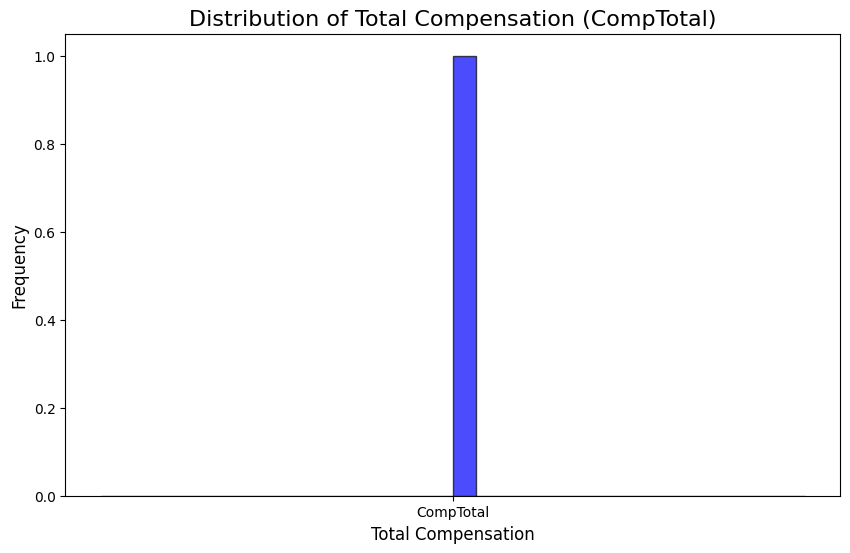

In [35]:
## Write your code here
import matplotlib.pyplot as plt

# Replace 'CompTotal' with the correct column name if necessary
plt.figure(figsize=(10, 6))

# Plotting the histogram of the total compensation
plt.hist('CompTotal', bins=30, color='blue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.title('Distribution of Total Compensation (CompTotal)', fontsize=16)
plt.xlabel('Total Compensation', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.show()





**Box Plots**

Plot a box plot of Age.


Available tables in the database:
   name
0  main
CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveW

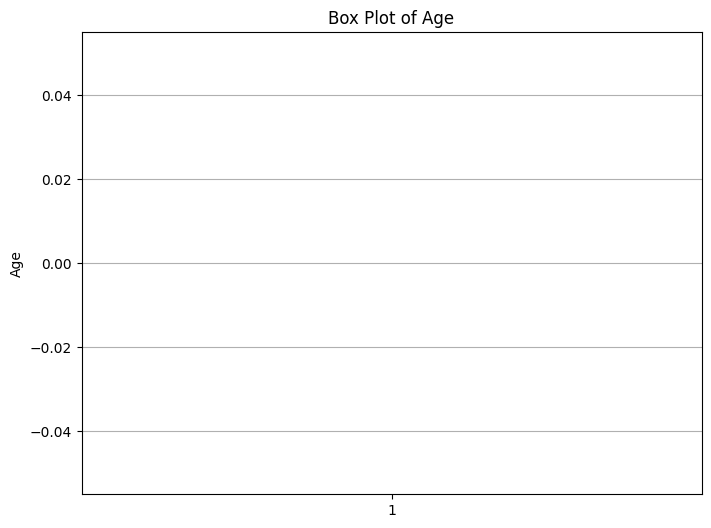

In [37]:

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')  # Replace with your actual database file

# Check available tables
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)
print("Available tables in the database:")
print(tables)

# Verify table name
table_name = 'main'  # Update if necessary
if table_name not in tables['name'].values:
    raise ValueError(f"Table '{table_name}' does not exist in the database.")

# Query the table structure (optional)
query_structure = f"SELECT sql FROM sqlite_master WHERE name='{table_name}';"
table_structure = pd.read_sql_query(query_structure, conn)
print(table_structure.iat[0, 0])

# Load data from the table
data_query = f"SELECT * FROM {table_name};"
data = pd.read_sql_query(data_query, conn)

# Ensure the 'Age' column is numeric
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Drop rows with NaN in the 'Age' column
cleaned_data = data['Age'].dropna()

# Plot a box plot for the 'Age' column
plt.figure(figsize=(8, 6))
plt.boxplot(cleaned_data, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'))
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.grid(axis='y')
plt.show()

# Close the connection
conn.close()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


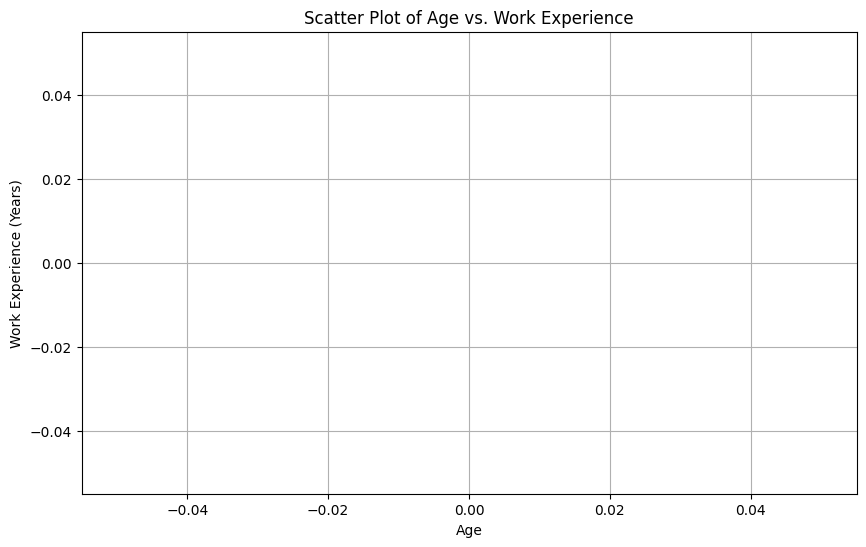

In [38]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')  # Replace with your actual database file

# Verify table existence
table_name = 'main'
query_tables = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query_tables, conn)
if table_name not in tables['name'].values:
    raise ValueError(f"Table '{table_name}' does not exist in the database.")

# Load data from the table
data_query = f"SELECT * FROM {table_name};"
data = pd.read_sql_query(data_query, conn)

# Ensure 'Age' and 'WorkExp' columns are numeric
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['WorkExp'] = pd.to_numeric(data['WorkExp'], errors='coerce')

# Drop rows with NaN values in 'Age' or 'WorkExp'
cleaned_data = data.dropna(subset=['Age', 'WorkExp'])

# Scatter plot for Age vs. WorkExp
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_data['Age'], cleaned_data['WorkExp'], alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Scatter Plot of Age vs. Work Experience')
plt.xlabel('Age')
plt.ylabel('Work Experience (Years)')
plt.grid(True)
plt.show()

# Close the connection
conn.close()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


Available tables in the database:
   name
0  main
Table structure:
CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,

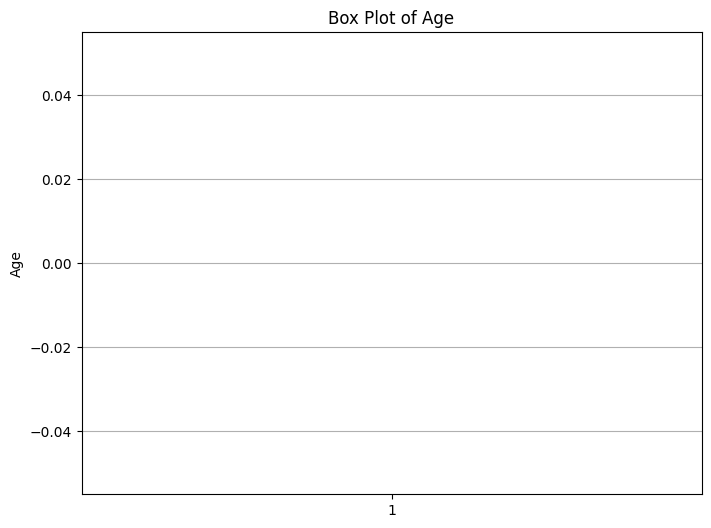

In [41]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')  # Replace with your actual database file

# Check available tables
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)
print("Available tables in the database:")
print(tables)

# Verify table name
table_name = 'main'  # Update if necessary
if table_name not in tables['name'].values:
    raise ValueError(f"Table '{table_name}' does not exist in the database.")

# Query the table structure (optional)
query_structure = f"SELECT sql FROM sqlite_master WHERE name='{table_name}';"
table_structure = pd.read_sql_query(query_structure, conn)
print("Table structure:")
print(table_structure.iat[0, 0])

# Load data from the table
data_query = f"SELECT * FROM {table_name};"
data = pd.read_sql_query(data_query, conn)

# Ensure the 'Age' column is numeric
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Drop rows with NaN in the 'Age' column
cleaned_data = data['Age'].dropna()

# Plot a box plot for the 'Age' column
plt.figure(figsize=(8, 6))
plt.boxplot(cleaned_data, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'))
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.grid(axis='y')
plt.show()

# Close the connection
conn.close()



### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


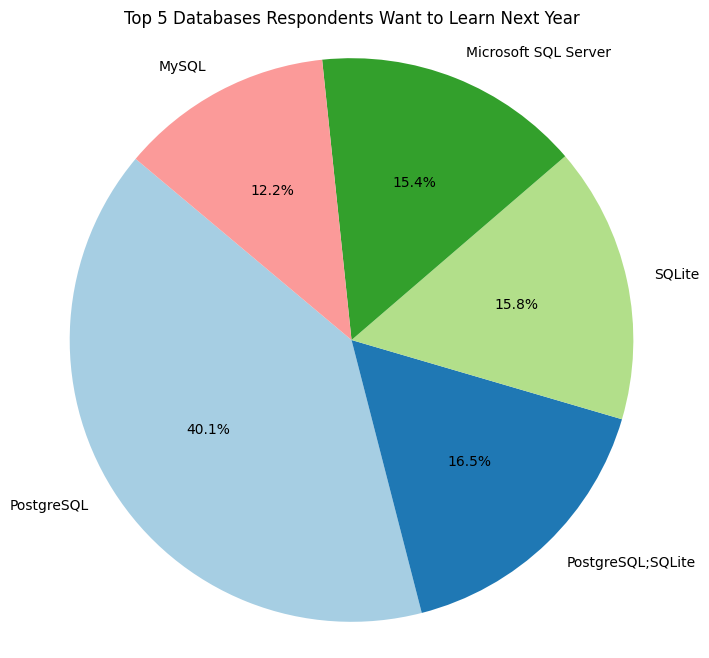

In [42]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')  # Replace with your actual database file

# Query the data for the column 'DatabaseWantToWorkWith'
data_query = "SELECT DatabaseWantToWorkWith FROM main;"  # Replace 'main' with your actual table name
data = pd.read_sql_query(data_query, conn)

# Drop any rows where 'DatabaseWantToWorkWith' is NaN or empty
data = data.dropna(subset=['DatabaseWantToWorkWith'])
data = data[data['DatabaseWantToWorkWith'].str.strip() != '']

# Count the occurrences of each database
database_counts = data['DatabaseWantToWorkWith'].value_counts()

# Get the top 5 databases
top_5_databases = database_counts.head(5)

# Plot the Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_databases, labels=top_5_databases.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 5 Databases Respondents Want to Learn Next Year')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

# Close the connection
conn.close()


**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


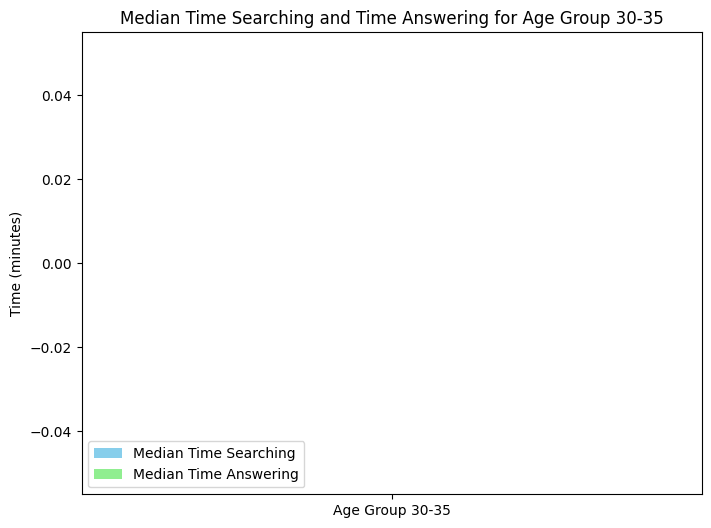

In [44]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')  # Replace with your actual database file

# Query the data for 'Age', 'TimeSearching', and 'TimeAnswering'
data_query = "SELECT Age, TimeSearching, TimeAnswering FROM main;"  # Replace 'main' with your actual table name
data = pd.read_sql_query(data_query, conn)

# Convert 'Age' column to numeric, coercing errors to NaN (if any non-numeric values)
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Filter data for respondents aged between 30 and 35
filtered_data = data[(data['Age'] >= 30) & (data['Age'] <= 35)]

# Calculate the median values for 'TimeSearching' and 'TimeAnswering'
median_values = filtered_data[['TimeSearching', 'TimeAnswering']].median()

# Create a stacked bar chart
plt.figure(figsize=(8, 6))

# Plot the stacked bar chart for median values
plt.bar('Age Group 30-35', median_values['TimeSearching'], label='Median Time Searching', color='skyblue')
plt.bar('Age Group 30-35', median_values['TimeAnswering'], label='Median Time Answering', bottom=median_values['TimeSearching'], color='lightgreen')

# Add labels and title
plt.ylabel('Time (minutes)')
plt.title('Median Time Searching and Time Answering for Age Group 30-35')
plt.legend()

# Show the plot
plt.show()

# Close the connection
conn.close()


### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


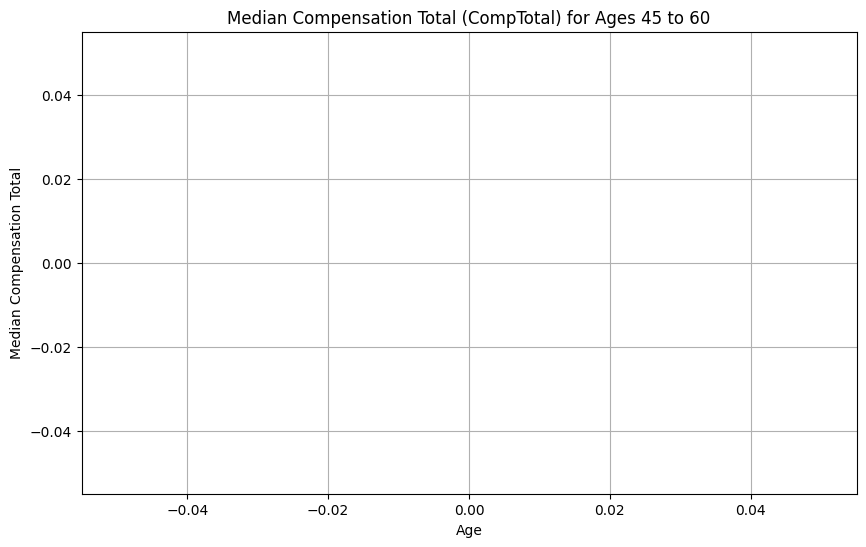

In [45]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')  # Replace with your actual database file

# Query the data for 'Age' and 'CompTotal'
data_query = "SELECT Age, CompTotal FROM main;"  # Replace 'main' with your actual table name
data = pd.read_sql_query(data_query, conn)

# Convert 'Age' and 'CompTotal' columns to numeric, coercing errors to NaN (if any non-numeric values)
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['CompTotal'] = pd.to_numeric(data['CompTotal'], errors='coerce')

# Filter data for respondents aged between 45 and 60
filtered_data = data[(data['Age'] >= 45) & (data['Age'] <= 60)]

# Group by Age and calculate the median CompTotal
median_comp_total = filtered_data.groupby('Age')['CompTotal'].median()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(median_comp_total.index, median_comp_total.values, marker='o', color='b', linestyle='-', linewidth=2)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Median Compensation Total')
plt.title('Median Compensation Total (CompTotal) for Ages 45 to 60')
plt.grid(True)

# Show the plot
plt.show()

# Close the connection
conn.close()


**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


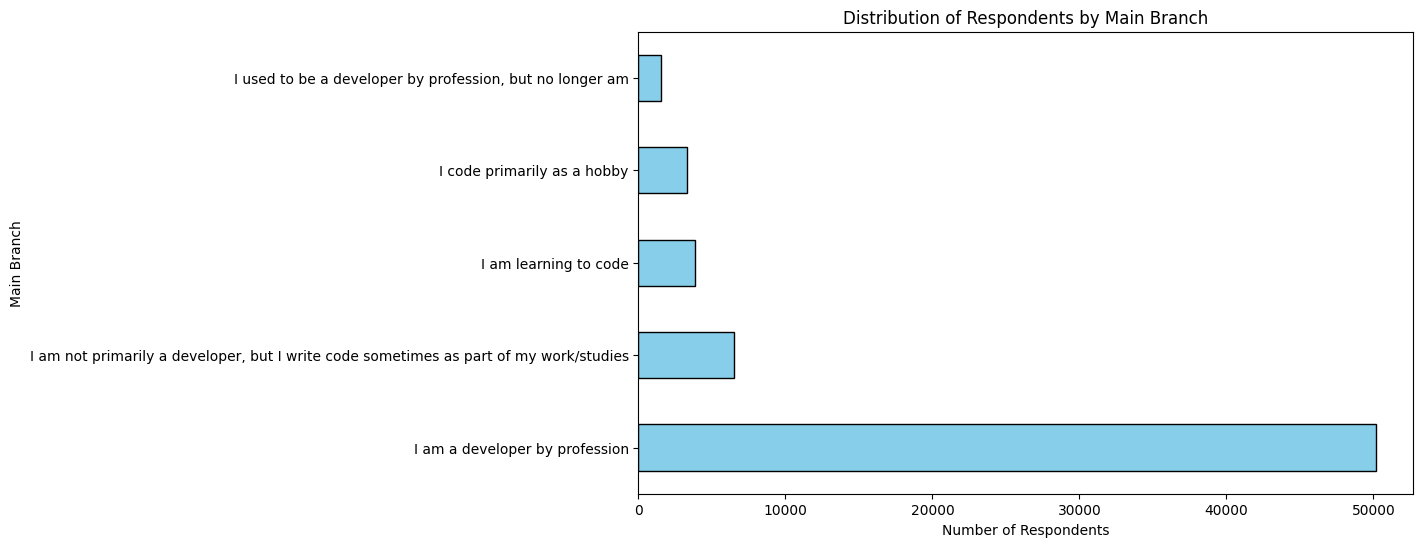

In [46]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')  # Replace with your actual database file

# Query the data for the 'MainBranch' column
data_query = "SELECT MainBranch FROM main;"  # Replace 'main' with your actual table name
data = pd.read_sql_query(data_query, conn)

# Drop rows with NaN or empty values in 'MainBranch'
data = data.dropna(subset=['MainBranch'])
data = data[data['MainBranch'].str.strip() != '']

# Count the occurrences of each category in 'MainBranch'
mainbranch_counts = data['MainBranch'].value_counts()

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
mainbranch_counts.plot(kind='barh', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Number of Respondents')
plt.ylabel('Main Branch')
plt.title('Distribution of Respondents by Main Branch')

# Show the plot
plt.show()

# Close the connection
conn.close()


### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
